# Exercise 9: Sound and music description

With this exercise you will learn to describe sounds with simple machine learning methods. You will learn to use the Freesound API to load pre-computed sound descriptors from Freesound and to perform sound clustering and classification with them. You will work with instrumental sounds, thus learning what audio features are useful for characterizing them.

There are four parts in this exercise: 1) Download sounds and descriptors from Freesound, 2) Select two descriptors for a good sound clustering, 3) Cluster sounds using k-means, and 4) Classify sounds using k-NN.

We provide the code for each task, thus no need to get involved in much programming. 

### Relevant Concepts

#### Freesound API
With the Freesound API you can browse, search, and retrieve information from Freesound, such as automatically extracted features from audio files. You can also perform advanced queries combining content analysis features and other metadata (tags, etc...). With the API you can do text searches similar to what you can do from the advance searches in the website http://freesound.org/search/?q, but implementing the the queries in software. If you are interested in knowing more about the Freesound API, you can see examples of using it with python in: https://github.com/MTG/freesound-python/blob/master/examples.py and you can read the API documentation, http://www.freesound.org/docs/api/

#### Sound descriptors
In this exercise, you will use sound descriptors that have been pre-computed with Essentia, https://essentia.upf.edu and are stored in the Freesound database together with the corresponding sounds. Many sound descriptors can be extracted using Essentia (http://essentia.upf.edu/documentation/algorithms_reference.html) and in Freesound, a number of them are used. In the Freesound API documentation there is specifc information of the descriptors available in Freesound, https://freesound.org/docs/api/analysis_index.html.

### Euclidian distance
The Euclidian distance is the straight-line distance between two points in an n-dimensional space, thus the distance between points $p$ and $q$ is the length of the line segment connecting them. If $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in Euclidean n-space, then the distance, $d$, from $p$ to $q$, or from $q$ to $p$ is given by the Pythagorean formula:

$ d(p,q) = \sqrt{\sum^n_{i=1} (q_i - p_i)^2} $


### K-means clustering (k-means)
K-means clustering is a method of vector quantization that is popular for cluster analysis in data mining. K-means clustering aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. The problem is computationally difficult (NP-hard), however, efficient heuristic algorithms converge quickly to a local optimum. 

Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k (≤ n)$ sets $S = {S_1, S_2, …, S_k}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$\underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^{k} \sum_{\mathbf x \in S_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2 = \underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^k |S_i| \operatorname{Var} S_i$, where $μ_i$ is the mean of points in $S_i$.


### K-nearest neighbours classifier (k-NN)
K-nearest neighbours classification (k-NN) is a non-parametric method in which the input consists of the $k$ closest training examples in the feature space. The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


## Part 1: Download sounds and descriptors from Freesound

Download a collection of intrumental sounds and their descriptors from Freesound using the Freesound API.

First get a Freesound API key from http://www.freesound.org/apiv2/apply/ and create a directory in the workspace with the name `testDownload` to store the sounds and descriptors. You also need to install the python client for the freesound API. Do this by cloning the repository https://github.com/MTG/freesound-python, into a folder and installing it following the instructions. You will have to import the freesound module in the code.

You will be calling the function `download_sounds_freesound()` whose input parameters are:
1. `queryText` (string): A single word or a string of words without spaces (use hyphens), typically the name of the instrument. e.g. (eg. "violin", "trumpet", "cello", "bassoon", etc.)
2. `tag` (string): tag to be used for filtering the searched sounds (e.g., "multisample", "single-note", "velocity", "tenuto", etc.).
3. `duration` (2 floating point numbers): min and max duration (seconds) of the sound to filter, e.g., (0.2,15).
4. `API_Key` (string): your api key.
5. `outputDir` (string): path to the directory where you want to store the sounds and their descriptors.
6. `topNResults` (integer): number of results (sounds) that you want to download.
7. `featureExt` (file extension): file extension for storing sound descriptor (.json, typically).

In the call to `download_sounds_freesound()` you will have to choose the appropriate queryText, tag, and duration, to return single notes/strokes of instrumental sounds. The first twenty results of the query should be "good". Note that the tag can be empty. Example of a query to obtain single notes of violin could be: `download_sounds_freesound(queryText='violin', API_Key=<your key>, outputDir='testDownload/', topNResults=20, duration=(0,8.5), tag='single-note')`. This returns 20 single notes of violin sounds and the script stores them in the testDownload directory (the directory has to be created beforehand).

Download and store twenty sound examples of each instrument using the `download_sounds_freesound()` function given below. The examples need to be representative of the instrument, single notes (melodic instruments) or single strokes (percussion instruments), and shorter than 10 seconds. Specify a good query text, tag, and duration to query for the chosen instruments. Refine your search parameters until you get twenty good samples for each instrument. Select three instruments to be used out of this set: violin, guitar, bassoon, trumpet, clarinet, cello, naobo (cymbals used in Beijing Opera). Listen to the sounds downloaded and look at the descriptor .json files.

Before using the API to download the sounds, we recommend to do the same query using the Freesound website and checking that the top 20 results are good.

In [1]:
import os, sys
import json
sys.path.append('../../freesound-python/')  # directory were you installed the freesound-python repository
import freesound as fs

descriptors = [ 'lowlevel.spectral_centroid.mean',
                'lowlevel.spectral_contrast.mean',
                'lowlevel.dissonance.mean',
                'lowlevel.hfc.mean',
                'lowlevel.mfcc.mean',
                'sfx.logattacktime.mean',
                'sfx.inharmonicity.mean']

In [2]:
def download_sounds_freesound(queryText = "", tag=None, duration=None, API_Key = "", outputDir = "", topNResults = 5, featureExt = '.json'):
  """
  This function downloads sounds and their descriptors from freesound using the queryText and the 
  tag specified in the input. Additionally, you can also specify the duration range to filter sounds 
  based on duration.
  
  Inputs:
        (Input parameters marked with a * are optional)
        queryText (string): query text for the sounds (eg. "violin", "trumpet", "cello", "bassoon" etc.)
        tag* (string): tag to be used for filtering the searched sounds. (eg. "multisample",  
                       "single-note" etc.)
        duration* (tuple): min and the max duration (seconds) of the sound to filter, eg. (0.2,15)
        API_Key (string): your api key, which you can obtain from : www.freesound.org/apiv2/apply/
        outputDir (string): path to the directory where you want to store the sounds and their 
                            descriptors
        topNResults (integer): number of results(sounds) that you want to download 
        featureExt (string): file extension for storing sound descriptors
  output:
        This function downloads sounds and descriptors, and then stores them in outputDir. In 
        outputDir it creates a directory of the same name as that of the queryText. In this 
        directory outputDir/queryText it creates a directory for every sound with the name 
        of the directory as the sound id. Additionally, this function also dumps a text file 
        containing sound-ids and freesound links for all the downloaded sounds in the outputDir. 
        NOTE: If the directory outputDir/queryText exists, it deletes the existing contents 
        and stores only the sounds from the current query. 
  """ 
  
  # Checking for the compulsory input parameters
  if queryText == "":
    print("\n")
    print("Provide a query text to search for sounds")
    return -1
    
  if API_Key == "":
    print("\n")
    print("You need a valid freesound API key to be able to download sounds.")
    print("Please apply for one here: www.freesound.org/apiv2/apply/")
    print("\n")
    return -1
    
  if outputDir == "" or not os.path.exists(outputDir):
    print("\n")
    print("Please provide a valid output directory. This will be the root directory for storing sounds and descriptors")
    return -1    
  
  # Setting up the Freesound client and the authentication key
  fsClnt = fs.FreesoundClient()
  fsClnt.set_token(API_Key,"token")  
  
  # Creating a duration filter string that the Freesound API understands
  if duration and type(duration) == tuple:
    flt_dur = " duration:[" + str(duration[0])+ " TO " +str(duration[1]) + "]"
  else:
    flt_dur = ""
 
  if tag and type(tag) == str:
    flt_tag = "tag:"+tag
  else:
    flt_tag = ""

  # Querying Freesound
  page_size = 30
  if not flt_tag + flt_dur == "":
    qRes = fsClnt.text_search(query=queryText ,filter = flt_tag + flt_dur,sort="score", fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  else:
    qRes = fsClnt.text_search(query=queryText ,sort="score",fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  
  outDir2 = os.path.join(outputDir, queryText)
  if os.path.exists(outDir2):             # If the directory exists, it deletes it and starts fresh
      os.system("rm -r " + outDir2)
  os.mkdir(outDir2)

  pageNo = 1
  sndCnt = 0
  indCnt = 0
  totalSnds = min(qRes.count,200)   # System quits after trying to download after 200 times
  
  # Creating directories to store output and downloading sounds and their descriptors
  downloadedSounds = []
  while(1):
    if indCnt >= totalSnds:
      print("Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.")
      break
    sound = qRes[indCnt - ((pageNo-1)*page_size)]
    print("Downloading mp3 preview and descriptors for sound with id: %s"%str(sound.id))
    outDir1 = os.path.join(outputDir, queryText, str(sound.id))
    if os.path.exists(outDir1):
      os.system("rm -r " + outDir1)
    os.system("mkdir " + outDir1)
    
    mp3Path = os.path.join(outDir1,  str(sound.previews.preview_lq_mp3.split("/")[-1]))
    ftrPath = mp3Path.replace('.mp3', featureExt)
    
    try:
      
      fs.FSRequest.retrieve(sound.previews.preview_lq_mp3, fsClnt, mp3Path)
      # Initialize a dictionary to store descriptors
      features = {}
      # Obtaining all the descriptors
      for desc in descriptors:
        features[desc]=[]
        features[desc].append(eval("sound.analysis."+desc))
      
      # Once we have all the descriptors, store them in a json file
      json.dump(features, open(ftrPath,'w'))
      sndCnt+=1
      downloadedSounds.append([str(sound.id), sound.url])

    except:
      if os.path.exists(outDir1):
        os.system("rm -r " + outDir1)
    
    indCnt +=1
    
    if indCnt%page_size==0:
      qRes = qRes.next_page()
      pageNo+=1
      
    if sndCnt>=topNResults:
      break
  # Dump the list of files and Freesound links
  fid = open(os.path.join(outDir2, queryText+'_SoundList.txt'), 'w')
  for elem in downloadedSounds:
    fid.write('\t'.join(elem)+'\n')
  fid.close()

In [3]:
# call download_sounds_freesound for 3 instruments
### your code here
key = 'df8HzfLYWCNJ2KyrErfjvykNulo0SkdHjXE4vaYC'
download_sounds_freesound(queryText='classical-guitar', API_Key=key, outputDir='../E9_sounds/', 
                          topNResults=20, duration=(0,8.5))
download_sounds_freesound(queryText='violin', API_Key=key, outputDir='../E9_sounds/', 
                          topNResults=20, duration=(0,8.5),tag='single-note')
download_sounds_freesound(queryText='cello-single-notes', API_Key=key, outputDir='../E9_sounds/', 
                          topNResults=20, duration=(0,8.5))

## Part 2: Select two descriptors for a good sound clustering

Select two of the sound descriptors obtained from Task 1 in order to obtain a good clustering of the sounds of three instruments in a two dimensional space. By visualizing the descriptor values of the sounds in a 2D plot you can choose the features that can help to better cluster these instruments. 

You take as inputs the downloaded sounds folder (`targetDir`) and the descriptor pair indices (`descInput`) (see mapping) to create a 2-D scatter plot of the descriptor pair. The data points, sounds, from different instruments are shown with different colors. In addition, you can also plot the Freesound ID of the sounds with the points. Only plot the sounds of the 3 instruments chosen. Make sure that in `targetDir` you only have the 3 instruments chosen.

Choose a good pair of descriptors for the sounds of the 3 instruments you downloaded in Part 1. A good pair of descriptors leads to a point distribution where all the sounds of an instrument cluster together, with a good separation from the other instrument clusters. Try out different combinations of descriptor pairs. Write a short paragraph on the descriptor pairs you tried out, justifying your choices for selecting those particular descriptors. Based on the spectral and temporal features of the instruments and sounds, give an explanation of why (or why not) a good clustering is (or is not) achieved with the chosen pairs of descriptors.

From the code given you can generate a 2-D scatter plot of all sounds for the chosen descriptor pairs. 

In [4]:
import os, sys
import numpy as np
%matplotlib notebook # added for modification  
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.cluster.vq import vq, kmeans, whiten

# Mapping of descriptors
descriptorMapping = { 0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean',
                      2: 'lowlevel.hfc.mean',
                      3: 'sfx.logattacktime.mean',
                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      9: 'lowlevel.spectral_contrast.mean.4',
                      10: 'lowlevel.spectral_contrast.mean.5',
                      11: 'lowlevel.mfcc.mean.0',
                      12: 'lowlevel.mfcc.mean.1',
                      13: 'lowlevel.mfcc.mean.2',
                      14: 'lowlevel.mfcc.mean.3',
                      15: 'lowlevel.mfcc.mean.4',
                      16: 'lowlevel.mfcc.mean.5'
                    }

In [5]:
def convFtrDict2List(ftrDict):
  """
  This function converts descriptor dictionary to an np.array. The order in the numpy array (indices) 
  are same as those mentioned in descriptorMapping dictionary.
  
  Input: 
    ftrDict (dict): dictionary containing descriptors downloaded from the freesound
  Output: 
    ftr (np.ndarray): Numpy array containing the descriptors for processing later on
  """
  ftr = []
  for key in range(len(descriptorMapping.keys())):
    try:
      ftrName, ind = '.'.join(descriptorMapping[key].split('.')[:-1]), int(descriptorMapping[key].split('.')[-1])
      ftr.append(ftrDict[ftrName][0][ind])
    except:
      ftr.append(ftrDict[descriptorMapping[key]][0])
  return np.array(ftr)

def fetchDataDetails(inputDir, descExt = '.json'):
  """
  This function is used by other functions to obtain the information regarding the directory structure 
  and the location of descriptor files for each sound 
  """
  dataDetails = {}
  for path, dname, fnames  in os.walk(inputDir):
    for fname in fnames:
      if descExt in fname.lower():
        remain, rname, cname, sname = path.split('/')[:-3], path.split('/')[-3], path.split('/')[-2], path.split('/')[-1]
        if cname not in dataDetails:
          dataDetails[cname]={}
        fDict = json.load(open(os.path.join('/'.join(remain), rname, cname, sname, fname),'r'))
        dataDetails[cname][sname]={'file': fname, 'feature':fDict}
  return dataDetails

<IPython.core.display.Javascript object>


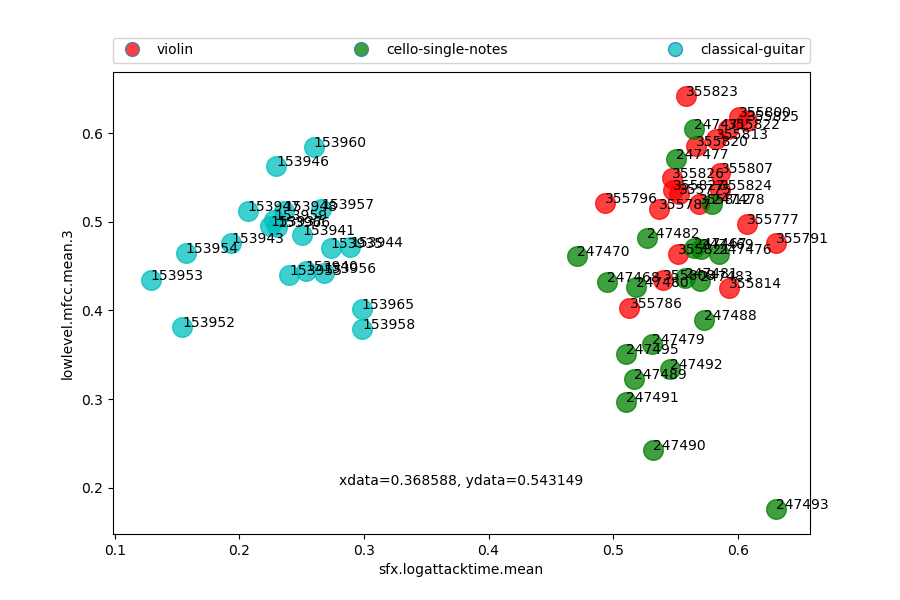

In [6]:
# code to select the descriptors to plot
# this cell is modified. click on plot to select sounds to play

%matplotlib notebook
import matplotlib.pyplot as plt

inputDir = "../E9_sounds/"
descInput = (3,14)

anotOn = 1

dataDetails = fetchDataDetails(inputDir)
colors = ['r', 'g', 'c', 'b', 'k', 'm', 'y']

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
text = ax.text(0.5, 0.1, 'matplotlib', horizontalalignment='center',
         verticalalignment='bottom',transform=ax.transAxes)

SoundID = []     # arrays to store info
instrument = [] 
xy = np.array([]) # xy coords of each sound
legArray = []
catArray = []

for ii, category in enumerate(dataDetails.keys()):
    catArray.append(category)
    for soundId in dataDetails[category].keys():
        filepath = os.path.join(inputDir, category, soundId, dataDetails[category][soundId]['file'])
        descSound = convFtrDict2List(json.load(open(filepath, 'r')))
        x_cord = descSound[descInput[0]]
        y_cord = descSound[descInput[1]]
        SoundID.append(soundId)
        instrument.append(category)
        xy = np.append(xy,[x_cord,y_cord])
        ax.scatter(x_cord, y_cord, c = colors[ii], s=200, alpha=0.75)
        if anotOn==1:
            ax.annotate(soundId, xy=(x_cord, y_cord), xytext=(x_cord, y_cord))
    circ = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor=colors[ii])
    legArray.append(circ)
        
plt.ylabel(descriptorMapping[descInput[1]])
plt.xlabel(descriptorMapping[descInput[0]])
plt.legend(legArray,catArray,numpoints=1,bbox_to_anchor=(0.,1.02,1.,.102),loc=3,ncol=len(catArray),mode="expand",borderaxespad=0.)

def onclick(event):  # gets click location
    tx = 'xdata=%f, ydata=%f' % (event.xdata, event.ydata)
    text.set_text(tx)
    global click_xy
    click_xy = [event.xdata,event.ydata]
    
cid = fig.canvas.mpl_connect('button_press_event', onclick) 
xy = np.reshape(xy,(60,2))

In [8]:
# click on plot above to select a sounds, and run this cell
import IPython.display as ipd
closest = np.sum(np.square(xy-click_xy),axis=1).argmin()  
selected = SoundID[closest]
print("selected sound is",selected,instrument[closest])
input_file = inputDir + instrument[closest] + '/' + SoundID[closest]+ '/' +dataDetails[instrument[closest]][SoundID[closest]]['file'][:-4] + 'mp3'
ipd.display(ipd.Audio(input_file, rate=fs))

selected sound is 153957 classical-guitar


"0" Spectral centroid mean: measurement for brightness. will increase with increasing magnitudes of higher   harmonics. It cannot seperate instruments completely.  
"1" Dissonance mean: cannot seperate anything. might be useful for seperating harmonic and non-harmonic sounds  
"2" HFC mean: high frequency content, good feature for seperating high violin sounds  
"3" Log Attack Time: Perfect to seperate guitar  
"4" Inharmonicity: cannot seperate anything. maybe because they are all string insturments  
"5" Spectral Contrast Mean 0: can seperate guitar, not completely  
"6" Spectral Contrast Mean 1: can seperate some violins and cellos, but guitars are worse  
"7" Spectral Contrast Mean 2: can seperate half of violins and cellos.  
"8" Spectral Contrast Mean 3: seperates more violins and cellos.  
"9" Spectral Contrast Mean 4: seperates large part of violins and cellos.  
"10" Spectral Contrast Mean 5: worse than 4 
"11" MFCC mean 0: can seperate guitar  
"12" MFCC mean 1: can seperate high pitched violins only  
"13" MFCC mean 2: can seperate violin-guitar, cannot seperate low violin - high cello  
"14" MFCC mean 3: cannot seperate anything  
"15" MFCC mean 4: can seperate violin-cello a little, cannot seperate guitar  
"16" MFCC mean 5: same as above  
  
Problem is seperating cello and violin, as "3" (attack time) taking care of guitar. Not possible to seperate all of them with 2 features only.  

In [9]:
ipd.display(ipd.Audio('../E9_sounds/cello-single-notes/247493/247493_6552981-lq.mp3', rate=fs))
ipd.display(ipd.Audio('../E9_sounds/violin/355796/355796_6552981-lq.mp3', rate=fs))
# Violin is brighter than cello

## Part 3: Cluster sounds using k-means

After visualizing the sound descriptors, you will now cluster the sounds using more than two descriptors. You can use as many descriptors as you need for the best clustering. Use the same set of sounds obtain in Task 1, starting from the descriptors that you found were good in Part 2, and then adding other descriptors that you feel can improve the kmeans clustering of sounds. The function `cluster_sounds()` takes the sounds folder (targetDir), number of clusters (nCluster) and the descriptor indices (descInput) as input. It then performs a kmeans clustering using the selected descriptors. Make sure that in targetDir you only have the 3 instruments chosen.

For this part, you can use as many descriptors as you need to achieve good clustering and classification performance. However it is best to use as few descriptors as possible in order to make it easier to explain the contribution of each descriptor. Choose the number of clusters to be the same as the number of instruments (i.e., 3). Ideally in such a case, all the sounds of an instrument should go into a single cluster. In reality however, there might be sounds that are outliers and can go into a different cluster. The algorithm takes a majority vote on the sounds in each of the three clusters and assigns each cluster to an instrument. We compute the performance of the clustering by checking the number of points (sounds), that have been wrongly assigned to a cluster. The function clusterSounds() prints the clusters and the sounds assigned to each one. The function also prints the resulting classification obtained with the choice of descriptors you made.

Write a short paragraph explaining the descriptors you used, the resulting classification accuracy you obtained, and your observations on why you obtained (or not) those errors in clustering. Comment if you see any systematic errors (such as a consistent mix up of sounds from two instruments) and possible reasons for that. You should also try to cluster with different subsets of descriptors and mention the classification accuracy you obtain in each case.

Note: Since the cluster centers are randomly initialized every time in k-means, you might see different results every time you run the function. You can report the best result you obtained.

In [10]:
def cluster_sounds(targetDir, nCluster = -1, descInput=[], prinT = 1):
  """
  This function clusters all the sounds in targetDir using kmeans clustering.
  
  Input:
    targetDir (string): Directory where sound descriptors are stored (all the sounds in this 
                        directory will be used for clustering)
    nCluster (int): Number of clusters to be used for kmeans clustering.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance 
                       computation (see descriptorMapping)
  Output:
    Prints the class of each cluster (computed by a majority vote), number of sounds in each 
    cluster and information (sound-id, sound-class and classification decision) of the sounds 
    in each cluster. Optionally, you can uncomment the return statement to return the same data.
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  ftrArr = []
  infoArr = []
  
  if nCluster ==-1:
    nCluster = len(dataDetails.keys())
  for cname in dataDetails.keys():
    #iterating over sounds
    for sname in dataDetails[cname].keys():
      ftrArr.append(convFtrDict2List(dataDetails[cname][sname]['feature'])[descInput])
      infoArr.append([sname, cname])
  
  ftrArr = np.array(ftrArr)
  infoArr = np.array(infoArr)
  
  ftrArrWhite = whiten(ftrArr)
  centroids, distortion = kmeans(ftrArrWhite, nCluster)
  clusResults = -1*np.ones(ftrArrWhite.shape[0])
  
  for ii in range(ftrArrWhite.shape[0]):
    diff = centroids - ftrArrWhite[ii,:]
    diff = np.sum(np.power(diff,2), axis = 1)
    indMin = np.argmin(diff)
    clusResults[ii] = indMin
  ClusterOut = []
  classCluster = []
  globalDecisions = []  
  for ii in range(nCluster):
    ind = np.where(clusResults==ii)[0]
    freqCnt = []
    for elem in infoArr[ind,1]:
      freqCnt.append(infoArr[ind,1].tolist().count(elem))
    indMax = np.argmax(freqCnt)
    classCluster.append(infoArr[ind,1][indMax])
    if prinT==1:
        print("\n(Cluster: " + str(ii) + ") Using majority voting as a criterion this cluster belongs to " + 
              "class: " + classCluster[-1])
        print ("Number of sounds in this cluster are: " + str(len(ind)))
    decisions = []
    for jj in ind:
        if infoArr[jj,1] == classCluster[-1]:
            decisions.append(1)
        else:
            decisions.append(0)
    globalDecisions.extend(decisions)
    if prinT==1:
        print ("sound-id, sound-class, classification decision")
    ClusterOut.append(np.hstack((infoArr[ind],np.array([decisions]).T)))
    if prinT==1:
        print (ClusterOut[-1])
  globalDecisions = np.array(globalDecisions)
  totalSounds = len(globalDecisions)
  nIncorrectClassified = len(np.where(globalDecisions==0)[0])
  if prinT==1:
      print("Out of %d sounds, %d sounds are incorrectly classified considering that one cluster should "
            "ideally contain sounds from only a single class"%(totalSounds, nIncorrectClassified))
      print("You obtain a classification (based on obtained clusters and majority voting) accuracy "
             "of %.2f percentage"%round(float(100.0*float(totalSounds-nIncorrectClassified)/totalSounds),2))
  return ClusterOut

In [11]:
# run the function clusterSounds 
### your code here
out = cluster_sounds(inputDir,3,[9,14,3])
z = np.append(np.append(out[0],out[1],axis=0),out[2],axis=0)
wronglist = z[np.where(z[:,2]=='0')[0]] # list of incorrectly classified sounds
wronglist


(Cluster: 0) Using majority voting as a criterion this cluster belongs to class: classical-guitar
Number of sounds in this cluster are: 20
sound-id, sound-class, classification decision
[['153940' 'classical-guitar' '1']
 ['153948' 'classical-guitar' '1']
 ['153944' 'classical-guitar' '1']
 ['153952' 'classical-guitar' '1']
 ['153957' 'classical-guitar' '1']
 ['153958' 'classical-guitar' '1']
 ['153965' 'classical-guitar' '1']
 ['153947' 'classical-guitar' '1']
 ['153959' 'classical-guitar' '1']
 ['153966' 'classical-guitar' '1']
 ['153955' 'classical-guitar' '1']
 ['153953' 'classical-guitar' '1']
 ['153943' 'classical-guitar' '1']
 ['153960' 'classical-guitar' '1']
 ['153935' 'classical-guitar' '1']
 ['153941' 'classical-guitar' '1']
 ['153937' 'classical-guitar' '1']
 ['153946' 'classical-guitar' '1']
 ['153954' 'classical-guitar' '1']
 ['153956' 'classical-guitar' '1']]

(Cluster: 1) Using majority voting as a criterion this cluster belongs to class: violin
Number of sounds in thi

array([['355808', 'violin', '0'],
       ['355796', 'violin', '0'],
       ['355821', 'violin', '0'],
       ['355786', 'violin', '0']], dtype='<U21')

In [12]:
# hear incorrectly classified sounds
for i in range (wronglist.shape[0]):
    input_file = inputDir + wronglist[i][1] + '/' + wronglist[i][0]+ '/' +dataDetails[wronglist[i][1]][wronglist[i][0]]['file'][:-4] + 'mp3'
    ipd.display(ipd.Audio(input_file, rate=fs))

In [13]:
# this loop tries every feature alone, and look if that feature can correctly classify the 
# sounds in wronglist 
# this gives us ideas for possible features to add, but it might cause other wrong classifications

for i in range (17):
    out = cluster_sounds(inputDir,3,[i],prinT = 0) 
    z = np.append(np.append(out[0],out[1],axis=0),out[2],axis=0)
    wronglist_2 = z[np.where(z[:,2]=='0')[0]]
    still_wrong = [x for x in wronglist[:,0] if any(wronglist_2[:,0]==x)]
    print("feature "+str(i)+" might reduce wronglist to\n"+ str(still_wrong))
    
# 3,9,13,14 classifies perfectly

feature 0 might reduce wronglist to
['355808', '355796', '355821', '355786']
feature 1 might reduce wronglist to
['355808', '355796', '355821', '355786']
feature 2 might reduce wronglist to
['355796', '355821']
feature 3 might reduce wronglist to
['355808', '355796', '355821', '355786']
feature 4 might reduce wronglist to
['355808', '355796', '355821', '355786']
feature 5 might reduce wronglist to
['355808', '355796']
feature 6 might reduce wronglist to
[]
feature 7 might reduce wronglist to
[]
feature 8 might reduce wronglist to
[]
feature 9 might reduce wronglist to
[]
feature 10 might reduce wronglist to
[]
feature 11 might reduce wronglist to
['355796']
feature 12 might reduce wronglist to
['355808', '355796', '355821', '355786']
feature 13 might reduce wronglist to
[]
feature 14 might reduce wronglist to
['355808', '355796', '355821', '355786']
feature 15 might reduce wronglist to
[]
feature 16 might reduce wronglist to
['355821']


In [14]:
# Finding 4 feature sets to classify perfectly (not possible with 3)
for i in range (17):
    for j in range(i+1,17):
        for k in range(j+1,17):
            for l in range(k+1,17):
                out = cluster_sounds(inputDir,3,[i,j,k,l],prinT = 0) 
                z = np.append(np.append(out[0],out[1],axis=0),out[2],axis=0)
                nWrong = z[np.where(z[:,2]=='0')[0]].shape[0]
                if nWrong == 0 :
                    print(i,j,k,l)

0 3 14 15
0 11 14 15
3 4 13 14
3 9 13 14
3 12 14 15


These are 5 sets of 4 features that can classify the sounds without error.

"0" Spectral centroid mean appeared once, is a measure of brightness so it makes sense because violin is brighter than cello.

"3" Log attack time is in three sets. Because guitar's attack time is significantly different

"9","10" Spectral Contrast Mean 4 and 5, both appeared once.

Jiang, Dan-Ning, Lie Lu, Hong-Jiang Zhang, Jian-Hua Tao, and Lian-Hong Cai. “Music type classification by spectral contrast feature.” In Multimedia and Expo, 2002. ICME‘02. Proceedings. 2002 IEEE International Conference on, vol. 1, pp. 113-116. IEEE, 2002.

According to the paper above; it measures the strength of spectral peaks (harmonics), valleys (non-harmonics), and their difference. It has more information than MFCCs and performs better in music type classification. Why they say 'music type' instead of genre?

It is calculated in 6 octave-scale bands, so features "9","10" are 5th and 6th , spectral contrast of 1600Hz-3200Hz and 3200Hz-8000Hz, I guess.

11, 12, 13, 14, 15, 16 are MFCCs. All of them are present in sets, "14" in all of them. Interestingly, when looking at plot of "14" in previous part, I wrote "14" cannot seperate anything. I am amazed.

I am not sure of their frequency bands. If they are first 6 coefficients, they might be 200-266Hz, 266-333Hz ... so on, according to the paper:  
  
https://pdfs.semanticscholar.org/f4b9/8dbd75c87a86a8bf0d7e09e3ebbb63d14954.pdf  
MFCC-FB40:  
"filter bank of 40 equal area filters, which cover the frequency range 133-6854 Hz. The
centre frequencies of the first 13 of them are linearly spaced in the range 200-1000 Hz with a step of 66.67 Hz and the ones of the next 27 are logarithmically spaced in the range 1071-6400 Hz"


## Part 4: Classify sounds with k-NN

Assign a sound different from the sounds of the 3 instruments chosen to one of the 3 instrumental classes you chose in Part 1, using the k-nearest neighbours classifier (k-NN). 

Given a new sound (query sound) and its descriptors, use the function `classify_sound_kNN()` for doing a k-NN classification. It uses a distance measure based on Euclidian distance which is implemented in `compute_similar_sounds()`. `classify_sound_kNN()` returns the instrument class that the query sound is classified into. 

The goal of the exercise is to experiment with the k-NN classifier and be able to understand the result by being able to explain why a particular query sound, that is not from any of the defined classes, is actually classified to one of those classes.

4.1 Get query sounds from Freesound. To get query sounds and their descriptors, you can use `download_sounds_freesound()` function using different query texts (as you did in Part 1). Get sounds that are not from the 3 instruments you chose in Part 1, or at least that is none of the sounds you used to define the classes. If you use a sound from one of the three instruments make sure that is different enough from the existing sounds in your collections.

4.2 Perform 5 classifications. You can use as many descriptors as you need (the fewer you use, the easier it will be, to explain the result). k is usually chosen to be an odd positive integer. Try out with different query sounds, different subsets of descriptors, and different values of k. Explain the reason for choosing the descriptors you used and the value of k you selected. Include cases where you think the classification is incorrect, and cases with a query sound of an instrument different from the starting classes. By trying out a sound from a different instrument, you are classifying the sound into the closest instrument class, which can tell you about similarity between instruments.

In [15]:
def compute_similar_sounds(queryFile, targetDir, descInput = []):
  """
  This function returns similar sounds for a specific queryFile. Given a queryFile this function 
  computes the distance of the query to all the sounds found in the targetDir and sorts them in 
  the increasing order of the distance. This way we can obtain similar sounds to a query sound.
  
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    descInput (list) : list of indices of the descriptors to be used for similarity/distance computation 
                       (see descriptorMapping)
  Output: 
    List containing an ordered list of similar sounds. 
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  #reading query feature dictionary
  qFtr = json.load(open(queryFile, 'r'))
  dist = []
  # Iterating over classes
  for cname in dataDetails.keys():
    # Iterating over sounds
    for sname in dataDetails[cname].keys():
      f1 =  convFtrDict2List(qFtr)
      f2 =  convFtrDict2List(dataDetails[cname][sname]['feature'])
      eucDist = np.sqrt(np.sum(np.power(np.array(f1[descInput]) - np.array(f2[descInput]), 2)))
      dist.append([eucDist, sname, cname])
  
  # Sorting the array based on the distance
  indSort = np.argsort(np.array(dist)[:,0])
  return (np.array(dist)[indSort,:]).tolist()

        
def classify_sound_kNN(queryFile, targetDir, K, descInput = []):
  """
  This function performs the KNN classification of a sound. The nearest neighbors are chosen from 
  the sounds in the targetDir.
   
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    K (int) : Number of nearest neighbors to consider for KNN classification.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance computation 
                      (see descriptorMapping)
  Output:
    predClass (string): Predicted class of the query sound
  """
  distances = compute_similar_sounds(queryFile, targetDir, descInput)
  if len(np.where((np.array(distances)[:,0].astype(np.float64))==0)[0])>0:
    print("Warning: We found an exact copy of the query file in the target directory. "
          "Beware of duplicates while doing KNN classification.")
  
  classes = (np.array(distances)[:K,2]).tolist()
  freqCnt = []
  for ii in range(K):
    freqCnt.append(classes.count(classes[ii]))
  indMax = np.argmax(freqCnt)
  predClass =  classes[indMax]
  print ("This sample belongs to class: " + str(predClass))
  return predClass


In [16]:
# 4.1 download one sound 
### your code here
key = 'df8HzfLYWCNJ2KyrErfjvykNulo0SkdHjXE4vaYC'
download_sounds_freesound(queryText = 'viola-single-note', API_Key=key, outputDir = '../E9_sounds_test/', 
                          topNResults=1, duration=(0,8.5))
"""
for copy-pasting purposes
working feature sets from above
[0,3,14,15]
[3,9,13,14]
[3,12,14,15]
[10,11,14,16]
[11,12,14,15]

spectral contrasts 
[5,6,7,8,9,10] 

mfccs
[11,12,13,14,15,16]

[0] Spectral centroid mean  
[1] Dissonance mean
[2] HFC mean
[3] Log Attack Time
[4] inharmonicity
"""

'\nfor copy-pasting purposes\nworking feature sets from above\n[0,3,14,15]\n[3,9,13,14]\n[3,12,14,15]\n[10,11,14,16]\n[11,12,14,15]\n\nspectral contrasts \n[5,6,7,8,9,10] \n\nmfccs\n[11,12,13,14,15,16]\n\n[0] Spectral centroid mean  \n[1] Dissonance mean\n[2] HFC mean\n[3] Log Attack Time\n[4] inharmonicity\n'

In [17]:
# 4.2 classify the donwloaded sound
### your code here
file =  '../E9_sounds_test/viola-single-note/153698/153698_2626346-lq.json'
pred = classify_sound_kNN(file, '../E9_sounds/', 3, descInput = [3,9,13,14] )

### explain the classification
"""
1,3: Dissonance and Inharmonicity: classical guitar: Viola's and guitar's strings are very close in thickness?
others: violin

mfccs: violin
spectral contrasts: violin
for all working feature sets found in previous part: violin: Viola's timbre is closer to violin than cello. 
"""

This sample belongs to class: violin


"\n1,3: Dissonance and Inharmonicity: classical guitar: Viola's and guitar's strings are very close in thickness?\nothers: violin\n\nmfccs: violin\nspectral contrasts: violin\nfor all working feature sets found in previous part: violin: Viola's timbre is closer to violin than cello. \n"

In [18]:
download_sounds_freesound(queryText = 'contrabass-g3-sustain', API_Key=key, outputDir = '../E9_sounds_test/', 
                          topNResults=1, duration=(0,9))

In [19]:
file =  '../E9_sounds_test/contrabass-g3-sustain/373126/373126_2475994-lq.json'
pred = classify_sound_kNN(file, '../E9_sounds/', 3, descInput = [3,12,14,15])

### explain the classification
"""
0 spectral centroid mean: guitar. 
Reason is contrabass is darker than violin and cello and since higher harmonics of 
guitar dies quickly after playing, it's spectral centroid mean is very low too. 

2 hfc mean: guitar: hfc and spectral centroid mean are similar

3, attack time: violin: for bowed instruments, this feature depends on playing

4, inharmonicity: violin: I was expecting cello

mfccs: cello
spectral contrasts: cello
for all working feature sets found in previous part: cello: Contrabass' timbre is closer to cello than violin
Note played by contrabass is g3, which can be played by violin too.
 
"""

This sample belongs to class: cello-single-notes


"\n0 spectral centroid mean: guitar. \nReason is contrabass is darker than violin and cello and since higher harmonics of \nguitar dies quickly after playing, it's spectral centroid mean is very low too. \n\n2 hfc mean: guitar: hfc and spectral centroid mean are similar\n\n3, attack time: violin: for bowed instruments, this feature depends on playing\n\n4, inharmonicity: violin: I was expecting cello\n\nmfccs: cello\nspectral contrasts: cello\nfor all working feature sets found in previous part: cello: Contrabass' timbre is closer to cello than violin\nNote played by contrabass is g3, which can be played by violin too.\n \n"

In [20]:
download_sounds_freesound(queryText = 'sax-tenor-f3', API_Key=key, outputDir = '../E9_sounds_test/', 
                          topNResults=1, duration=(4,8))

In [21]:
file =  '../E9_sounds_test/sax-tenor-f3/359190/359190_6552981-lq.json'
pred = classify_sound_kNN(file, '../E9_sounds/', 3, descInput =[3,12,14,15] )

"""
0 spectral centroid mean: guitar 

3, attack time:cello, because attack of sax is slow

for first three working feature sets: violin
other two sets which only contain mfcc: cello

when all spectral contrast or all mfccs used: cello, its timbre is closest to cello
"""

This sample belongs to class: violin


'\n0 spectral centroid mean: guitar \n\n3, attack time:cello, because attack of sax is slow\n\nfor first three working feature sets: violin\nother two sets which only contain mfcc: cello\n\nwhen all spectral contrast or all mfccs used: cello, its timbre is closest to cello\n'

In [22]:
download_sounds_freesound(queryText = 'bass-D1-hohner', API_Key=key, outputDir = '../E9_sounds_test/', 
                          topNResults=1, duration=(4,8))

In [23]:
file =  '../E9_sounds_test/bass-D1-hohner/43941/43941_476689-lq.json' # bass guitar
pred = classify_sound_kNN(file, '../E9_sounds/', 3, descInput = [0])

"""
"0": cello: not bright, like cello, but this sound has a long sustain, that's why it is not predicted as guitar
"3": attack: guitar: because it's a bass guitar, attack is similar to classical guitar
"4": inharmonicity: cello: inharmonicity of a string depends on its thickness. So this makes sense

spectral contrasts: cello
mfccs: cello
for all feature sets from prev. part: cello: Its timbre is closest to cello
"""

This sample belongs to class: cello-single-notes


'\n"0": cello: not bright, like cello, but this sound has a long sustain, that\'s why it is not predicted as guitar\n"3": attack: guitar: because it\'s a bass guitar, attack is similar to classical guitar\n"4": inharmonicity: cello: inharmonicity of a string depends on its thickness. So this makes sense\n\nspectral contrasts: cello\nmfccs: cello\nfor all feature sets from prev. part: cello: Its timbre is closest to cello\n'

In [24]:
download_sounds_freesound(queryText = 'daluo-single', API_Key=key, outputDir = '../E9_sounds_test/', 
                          topNResults=1, duration=(2,5))

In [25]:
file =  '../E9_sounds_test/daluo-single/205972/205972_2385996-lq.json' # daluo, chinese percussion
pred = classify_sound_kNN(file, '../E9_sounds/', 3, descInput = [11,12,13,14,15,16])
"""
0,1,2: cello
3: attack: guitar
4: violin

spectral contrasts: cello
mfccs: guitar

five feature sets from prev. part: guitar: sets that contain attack time are understandable.
but why it is closer to guitar according to MFCCs?

When you pluck a string, it starts from a little higher pitch because of the 
dislocation caused by finger. I'm not sure if this is true, but at least, it starts brighter, higher harmonics
vanish fastly. This daluo sound is like a string plucked heavily (pulling string for 5 cm), 
with decaying harmonics and buzzy sound. That might be the reason for mfccs to select guitar.
"""

This sample belongs to class: classical-guitar


"\n0,1,2: cello\n3: attack: guitar\n4: violin\n\nspectral contrasts: cello\nmfccs: guitar\n\nfive feature sets from prev. part: guitar: sets that contain attack time are understandable.\nbut why it is closer to guitar according to MFCCs?\n\nWhen you pluck a string, it starts from a little higher pitch because of the \ndislocation caused by finger. I'm not sure if this is true, but at least, it starts brighter, higher harmonics\nvanish fastly. This daluo sound is like a string plucked heavily (pulling string for 5 cm), \nwith decaying harmonics and buzzy sound. That might be the reason for mfccs to select guitar.\n"